In [1]:
import numpy as np
import pandas as pd

In [2]:
df_try = pd.read_csv("../data/FIRM-NASA-fire-alert-data/DL_FIRE_J1V-C2_591395/fire_archive_J1V-C2_591395.csv")

In [3]:
df_try

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,16.29705,103.78316,339.22,0.50,0.41,2018-04-01,603,N20,VIIRS,n,2,300.99,4.94,D,0
1,16.21809,103.21005,335.21,0.53,0.42,2018-04-01,603,N20,VIIRS,n,2,302.51,3.10,D,0
2,16.18192,103.56709,333.21,0.51,0.41,2018-04-01,603,N20,VIIRS,n,2,296.31,3.59,D,0
3,15.88159,102.03447,336.77,0.42,0.45,2018-04-01,603,N20,VIIRS,n,2,295.09,3.66,D,0
4,15.88229,102.03834,341.89,0.42,0.45,2018-04-01,603,N20,VIIRS,n,2,295.13,3.66,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007832,14.04759,99.00271,299.40,0.39,0.36,2024-11-30,1853,N20,VIIRS,n,2,288.80,0.25,N,0
1007833,13.52011,100.78498,314.02,0.40,0.37,2024-11-30,1853,N20,VIIRS,n,2,292.78,1.12,N,0
1007834,13.23041,101.16319,301.00,0.41,0.37,2024-11-30,1854,N20,VIIRS,n,2,290.67,0.51,N,0
1007835,12.50110,102.40980,301.61,0.46,0.39,2024-11-30,1854,N20,VIIRS,n,2,290.15,0.49,N,0


In [4]:
#center of Bangkok 13.75633	100.50177
from math import radians, cos, sin, sqrt, atan2

#https://data.opendevelopmentmekong.net/dataset/thailand-provincial-boundaries
#https://www.mapsofworld.com/lat_long/thailand-lat-long.html
#https://data.humdata.org/dataset/cod-ab-tha

c_latitude = 13.75633
c_longitude = 100.50177
radius = 70 #km

In [5]:
#https://undergroundmathematics.org/trigonometry-compound-angles/the-great-circle-distance

def distancesphere(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in km

    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c

    return distance

In [6]:
df_try['distance_km'] = df_try.apply(lambda row: distancesphere(c_latitude, c_longitude, row['latitude'], row['longitude']), axis=1)

In [7]:
df_try['distance_km']

0          451.632057
1          399.422940
2          425.617335
3          288.076693
4          288.378435
              ...    
1007832    165.014220
1007833     40.329946
1007834     92.381943
1007835    249.339043
1007836    136.558247
Name: distance_km, Length: 1007837, dtype: float64

In [8]:
within_radius_df = df_try[df_try['distance_km'] <= radius]
print(within_radius_df[['latitude', 'longitude', 'distance_km']])

         latitude  longitude  distance_km
490      14.06136  100.42788    34.842810
564      13.83529  100.23379    30.240999
566      13.87908  100.35175    21.182496
567      13.99993  100.30132    34.668834
573      14.15454  100.24605    52.174039
...           ...        ...          ...
1007486  14.07704  100.64485    38.861398
1007504  14.07771  100.64893    39.106537
1007516  13.70230  100.61863    13.979758
1007517  13.76492  100.90894    43.986114
1007833  13.52011  100.78498    40.329946

[13619 rows x 3 columns]


In [9]:
# within_radius_df.to_csv("inspect.csv")

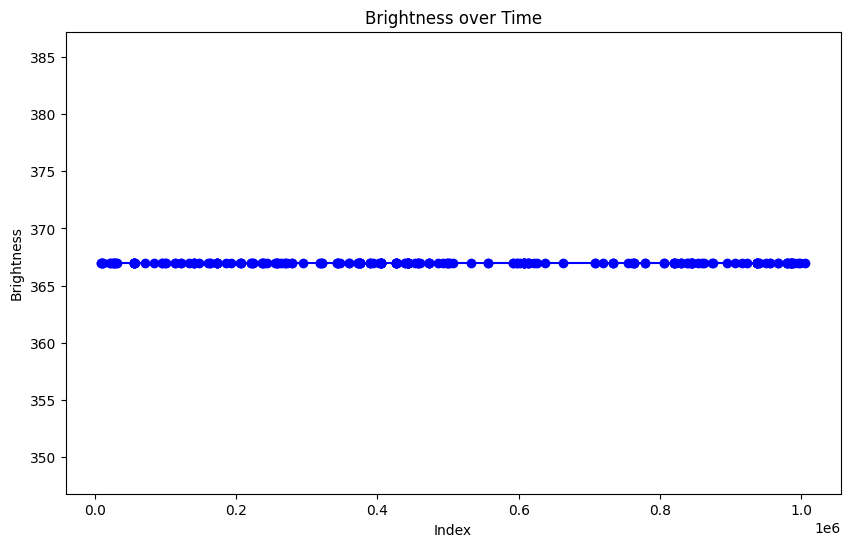

In [10]:

#plot all columns brightness
import matplotlib.pyplot as plt

def plot_brightness(df):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(df.loc[df['confidence'].isin(['h']), 'brightness'], marker='o', linestyle='-', color='b')
    ax.set_title('Brightness over Time')
    ax.set_xlabel('Index')
    ax.set_ylabel('Brightness')
    plt.show()

plot_brightness(within_radius_df)

In [11]:
print(df_try.shape)
print(df_try.loc[df_try['confidence'].isin(['h']), 'brightness'].count())
print(within_radius_df.shape)
print(within_radius_df.loc[within_radius_df['confidence'].isin(['h']), 'brightness'].count())

(1007837, 16)
17177
(13619, 16)
228


In [12]:
df_test = pd.read_csv("../data/boundaries/85b172c6-dc66-4088-a5c5-e01d9ff632c2.csv")

In [13]:
df_test.head()

,_id,Shape_Leng,Shape_Area,ADM1_EN,ADM1_TH,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM1ALT1TH,ADM1ALT2TH,ADM0_EN,ADM0_TH,ADM0_PCODE,date,validOn,validTo,the_geom
0,0,3.927244,0.275313,Amnat Charoen,อำนาจเจริญ,TH37,NaN,NaN,NaN,NaN,NaN,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,NaN,0106000020E610000001000000010300000001000000E5...
1,1,1.739908,0.079210,Ang Thong,อ่างทอง,TH15,NaN,NaN,NaN,NaN,NaN,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,NaN,0106000020E610000001000000010300000001000000FC...
2,2,2.417227,0.131339,Bangkok,กรุงเทพมหานคร,TH10,NaN,NaN,NaN,NaN,NaN,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,NaN,0106000020E61000000100000001030000000100000035...
3,3,4.414998,0.340784,Bueng Kan,บึงกาฬ,TH38,NaN,NaN,NaN,NaN,NaN,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,NaN,0106000020E610000001000000010300000001000000A4...
4,4,8.701859,0.844537,Buri Ram,บุรีรัมย์,TH31,NaN,NaN,NaN,NaN,NaN,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,NaN,0106000020E61000000100000001030000000100000038...


In [14]:
print(df_test["the_geom"])

0     0106000020E610000001000000010300000001000000E5...
1     0106000020E610000001000000010300000001000000FC...
2     0106000020E61000000100000001030000000100000035...
3     0106000020E610000001000000010300000001000000A4...
4     0106000020E61000000100000001030000000100000038...
                            ...                        
72    0106000020E61000000100000001030000000100000005...
73    0106000020E610000001000000010300000001000000D2...
74    0106000020E610000001000000010300000001000000BC...
75    0106000020E610000001000000010300000001000000F4...
76    0106000020E610000001000000010300000001000000AC...
Name: the_geom, Length: 77, dtype: object


In [15]:
df_check = pd.read_excel("../data/boundaries/tha_adminboundaries_tabulardata.xlsx", sheet_name='ADM1')

In [16]:
df_check

,ADM1_EN,ADM1_TH,ADM1_PCODE,ADM1_REF,ADM1ALT1_EN,ADM1ALT2_EN,ADM1ALT1_TH,ADM1ALT2_TH,ADM0_EN,ADM0_TH,ADM0_PCODE,DATE,VALIDON,VALIDTO,AREA_SQKM
0,Bangkok,กรุงเทพมหานคร,TH10,NaN,NaN,NaN,NaN,NaN,Thailand,ประเทศไทย,TH,2019-02-18,2022-01-22,NaN,1571.371336
1,Samut Prakan,สมุทรปราการ,TH11,NaN,NaN,NaN,NaN,NaN,Thailand,ประเทศไทย,TH,2019-02-18,2022-01-22,NaN,949.001113
2,Nonthaburi,นนทบุรี,TH12,NaN,NaN,NaN,NaN,NaN,Thailand,ประเทศไทย,TH,2019-02-18,2022-01-22,NaN,636.542920
3,Pathum Thani,ปทุมธานี,TH13,NaN,NaN,NaN,NaN,NaN,Thailand,ประเทศไทย,TH,2019-02-18,2022-01-22,NaN,1517.386645
4,Phra Nakhon Si Ayutthaya,พระนครศรีอยุธยา,TH14,NaN,NaN,NaN,NaN,NaN,Thailand,ประเทศไทย,TH,2019-02-18,2022-01-22,NaN,2553.360962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Trang,ตรัง,TH92,NaN,NaN,NaN,NaN,NaN,Thailand,ประเทศไทย,TH,2019-02-18,2022-01-22,NaN,4709.743170
73,Phatthalung,พัทลุง,TH93,NaN,NaN,NaN,NaN,NaN,Thailand,ประเทศไทย,TH,2019-02-18,2022-01-22,NaN,3860.383277
74,Pattani,ปัตตานี,TH94,NaN,NaN,NaN,NaN,NaN,Thailand,ประเทศไทย,TH,2019-02-18,2022-01-22,NaN,1966.320520
75,Yala,ยะลา,TH95,NaN,NaN,NaN,NaN,NaN,Thailand,ประเทศไทย,TH,2019-02-18,2022-01-22,NaN,4472.740198


In [17]:
df_check = df_check[['ADM1_EN', 'ADM1_TH', 'AREA_SQKM']]
df_check

,ADM1_EN,ADM1_TH,AREA_SQKM
0,Bangkok,กรุงเทพมหานคร,1571.371336
1,Samut Prakan,สมุทรปราการ,949.001113
2,Nonthaburi,นนทบุรี,636.542920
3,Pathum Thani,ปทุมธานี,1517.386645
4,Phra Nakhon Si Ayutthaya,พระนครศรีอยุธยา,2553.360962
...,...,...,...
72,Trang,ตรัง,4709.743170
73,Phatthalung,พัทลุง,3860.383277
74,Pattani,ปัตตานี,1966.320520
75,Yala,ยะลา,4472.740198


In [18]:
from math import pi

In [19]:
area = 0
i = 0
target = 100 * 1.2
while not (area > target):
    area = pi * (i**2)
    i = i+0.5

print(area)

132.73228961416876


In [20]:
df_check.rename(columns={"ADM1_EN": "English_name"}, inplace=True)
df_check.rename(columns={"ADM1_TH": "Thai_name"}, inplace = True)
df_check.rename(columns={"AREA_SQKM": "AREA"}, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_27112\2392656376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check.rename(columns={"ADM1_EN": "English_name"}, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_27112\2392656376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check.rename(columns={"ADM1_TH": "Thai_name"}, inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_27112\2392656376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [21]:
df_check

,English_name,Thai_name,AREA
0,Bangkok,กรุงเทพมหานคร,1571.371336
1,Samut Prakan,สมุทรปราการ,949.001113
2,Nonthaburi,นนทบุรี,636.542920
3,Pathum Thani,ปทุมธานี,1517.386645
4,Phra Nakhon Si Ayutthaya,พระนครศรีอยุธยา,2553.360962
...,...,...,...
72,Trang,ตรัง,4709.743170
73,Phatthalung,พัทลุง,3860.383277
74,Pattani,ปัตตานี,1966.320520
75,Yala,ยะลา,4472.740198


In [22]:
df_check[["English_name", "Thai_name"]].drop_duplicates()

,English_name,Thai_name
0,Bangkok,กรุงเทพมหานคร
1,Samut Prakan,สมุทรปราการ
2,Nonthaburi,นนทบุรี
3,Pathum Thani,ปทุมธานี
4,Phra Nakhon Si Ayutthaya,พระนครศรีอยุธยา
...,...,...
72,Trang,ตรัง
73,Phatthalung,พัทลุง
74,Pattani,ปัตตานี
75,Yala,ยะลา


In [23]:
df_pmmap = pd.read_csv("../data/a1/PM_map.csv")
df_pmmap

,รหัสสถานี,ชื่อสถานี,รายละเอียดจุดติดตั้งสถานี,จังหวัด,english_name,adm1__id
0,02T,แขวงหิรัญรูจี เขตธนบุรี กทม.,มหาวิทยาลัยราชภัฏบ้านสมเด็จเจ้าพระยา,กทม.,Bangkok Metropolis,3.0
1,05T,แขวงบางนา เขตบางนา กทม.,กรมอุตุนิยมวิทยา,กทม.,Bangkok Metropolis,3.0
2,10T,แขวงคลองจั่น เขตบางกะปิ กทม.,เคหะชุมชนคลองจั่น,กทม.,Bangkok Metropolis,3.0
3,11T,แขวงดินแดง เขตดินแดง กทม.,สนามกีฬาเคหะชุมชนห้วยขวาง,กทม.,Bangkok Metropolis,3.0
4,12T,แขวงช่องนนทรี เขตยานนาวา กทม.,โรงเรียนนนทรีวิทยา,กทม.,Bangkok Metropolis,3.0
...,...,...,...,...,...,...
91,63T,ต.สะเตง อ.เมือง จ.ยะลา,สวนสาธารณะสนามโรงพิธีช้างเผือก ยะลา,จ.ยะลา,Yala,76.0
92,78T,ต.เบตง อ.เบตง จ.ยะลา,ศูนย์พัฒนาเด็กเล็กเทศบาลเมืองเบตง,จ.ยะลา,Yala,76.0
93,80T,ต.พิมาน อ.เมือง. จ.สตูล,ศาลากลางจังหวัดสตูล,จ.สตูล,Satun,61.0
94,89T,ต.คลัง อ.เมือง จ.นครศรีธรรมราช,ศูนย์ฟื้นฟูสุขภาพผู้สูงอายุ,จ.นครศรีธรรมราช,Nakhon Si Thammarat,31.0


In [24]:
df_check.loc[df_check["English_name"] == "Bangkok", "English_name"] = "Bangkok Metropolis"
df_check

,English_name,Thai_name,AREA
0,Bangkok Metropolis,กรุงเทพมหานคร,1571.371336
1,Samut Prakan,สมุทรปราการ,949.001113
2,Nonthaburi,นนทบุรี,636.542920
3,Pathum Thani,ปทุมธานี,1517.386645
4,Phra Nakhon Si Ayutthaya,พระนครศรีอยุธยา,2553.360962
...,...,...,...
72,Trang,ตรัง,4709.743170
73,Phatthalung,พัทลุง,3860.383277
74,Pattani,ปัตตานี,1966.320520
75,Yala,ยะลา,4472.740198


In [25]:
df_adminid = pd.read_csv("../data/Wild_Fire/Cumulative Fire Alerts in Thailand/adm1_metadata.csv")
df_adminid

,name,adm1__id
0,Amnat Charoen,1
1,Ang Thong,2
2,Bangkok Metropolis,3
3,Bueng Kan,4
4,Buri Ram,5
...,...,...
72,Udon Thani,73
73,Uthai Thani,74
74,Uttaradit,75
75,Yala,76


In [26]:
# Map 'adm1__id' from df_adminid to df_check based on 'English_name'
df_check['adm1_id'] = df_check['English_name'].map(df_adminid.set_index('name')['adm1__id'])

# Verify the mapping
df_check['adm1_id'] == df_adminid.set_index('name').loc[df_check['English_name'], 'adm1__id'].values

df_check[['English_name', 'adm1_id']]

C:\Users\HP\AppData\Local\Temp\ipykernel_27112\374992257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check['adm1_id'] = df_check['English_name'].map(df_adminid.set_index('name')['adm1__id'])


,English_name,adm1_id
0,Bangkok Metropolis,3
1,Samut Prakan,57
2,Nonthaburi,36
3,Pathum Thani,37
4,Phra Nakhon Si Ayutthaya,46
...,...,...
72,Trang,70
73,Phatthalung,40
74,Pattani,38
75,Yala,76


In [27]:
pd.set_option('display.max_rows', None)

df_check.sort_values('adm1_id', inplace=True)
print(df_check)

#reset display options as default
pd.reset_option('display.max_rows')

                English_name        Thai_name          AREA  adm1_id
25             Amnat Charoen       อำนาจเจริญ   3262.571368        1
5                  Ang Thong          อ่างทอง    944.216921        2
0         Bangkok Metropolis    กรุงเทพมหานคร   1571.371336        3
26                 Bueng Kan           บึงกาฬ   3991.221379        4
19                  Buri Ram        บุรีรัมย์  10058.251514        5
14              Chachoengsao       ฉะเชิงเทรา   5165.910411        6
8                   Chai Nat           ชัยนาท   2486.567838        7
24                Chaiyaphum          ชัยภูมิ  12615.756015        8
12               Chanthaburi         จันทบุรี   6403.634178        9
38                Chiang Mai        เชียงใหม่  22176.037103       10
45                Chiang Rai         เชียงราย  11584.266449       11
10                 Chon Buri           ชลบุรี   4504.763605       12
69                  Chumphon            ชุมพร   6021.565231       13
34                   Kalasin      

C:\Users\HP\AppData\Local\Temp\ipykernel_27112\598184385.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check.sort_values('adm1_id', inplace=True)


In [28]:
data = pd.read_json("data.json")

# If you need to skip the first row, you can drop it after loading the data
data = data.iloc[0:]

In [29]:
data

,0,1,2
0,Location,Latitude,Longitude
1,Amnat Charoen,15°51'N,104°38'E
2,Ang Thong,14°35'N,100°31'E
3,Aranyaprathet,13°41'N,102°30'E
4,Ban Bang Hin,09°32'N,98°35'E
...,...,...,...
131,Lom Sak,16°47'N,101°15'E
132,Lop Buri,14°48'N,100°37'E
133,"Luang, Thale",07°30'N,100°15'E
134,Mae Chan,20°09'N,99°52'E


In [30]:
#index 0 is column names
data.columns = data.iloc[0]
data = data[1:]
data.reset_index(drop=True, inplace=True)

data

,Location,Latitude,Longitude
0,Amnat Charoen,15°51'N,104°38'E
1,Ang Thong,14°35'N,100°31'E
2,Aranyaprathet,13°41'N,102°30'E
3,Ban Bang Hin,09°32'N,98°35'E
4,Ban Chiang Klang,19°25'N,100°55'E
...,...,...,...
130,Lom Sak,16°47'N,101°15'E
131,Lop Buri,14°48'N,100°37'E
132,"Luang, Thale",07°30'N,100°15'E
133,Mae Chan,20°09'N,99°52'E


In [31]:
# Check if the 'Location' column in 'data' matches any province in 'df_check["English_name"]'
data['is_province'] = data['Location'].isin(df_check['English_name'])

# Display the rows where 'is_province' is True
data[data['is_province']]

C:\Users\HP\AppData\Local\Temp\ipykernel_27112\3280862945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_province'] = data['Location'].isin(df_check['English_name'])


,Location,Latitude,Longitude,is_province
0,Amnat Charoen,15°51'N,104°38'E,True
1,Ang Thong,14°35'N,100°31'E,True
52,Chachoengsao,13°42'N,101°05'E,True
60,Chanthaburi,12°38'N,102°12'E,True
70,Chiang Mai,18°47'N,98°59'E,True
71,Chiang Rai,19°52'N,99°50'E,True
76,Chon Buri,13°21'N,101°01'E,True
80,Chumphon,10°35'N,99°14'E,True
95,Kalasin,16°26'N,103°30'E,True
96,Kamphaeng Phet,16°28'N,99°30'E,True


In [32]:
df_provinces = pd.read_csv("../data/boundaries/provinces.csv")

In [33]:
df_provinces

,province_id,province_name,province_lat,province_lon,province_zoom
0,1,กรุงเทพมหานคร,13.727896,100.524123,13
1,2,กระบี่,8.086300,98.906283,13
2,3,กาญจนบุรี,14.022780,99.532811,13
3,4,กาฬสินธุ์,16.431408,103.505876,13
4,5,กำแพงเพชร,16.482780,99.522662,13
...,...,...,...,...,...
72,73,อุดรธานี,17.413841,102.787233,13
73,74,อุตรดิตถ์,17.620089,100.099294,13
74,75,อุทัยธานี,15.383500,100.024553,13
75,76,อุบลราชธานี,15.228686,104.856422,13


In [34]:
df_provinces['is_province'] = df_provinces['province_name'].isin(df_check['Thai_name'])
df_provinces[df_provinces['is_province']]

,province_id,province_name,province_lat,province_lon,province_zoom,is_province
0,1,กรุงเทพมหานคร,13.727896,100.524123,13,True
1,2,กระบี่,8.086300,98.906283,13,True
2,3,กาญจนบุรี,14.022780,99.532811,13,True
3,4,กาฬสินธุ์,16.431408,103.505876,13,True
4,5,กำแพงเพชร,16.482780,99.522662,13,True
...,...,...,...,...,...,...
72,73,อุดรธานี,17.413841,102.787233,13,True
73,74,อุตรดิตถ์,17.620089,100.099294,13,True
74,75,อุทัยธานี,15.383500,100.024553,13,True
75,76,อุบลราชธานี,15.228686,104.856422,13,True


In [35]:
# กทม
# เชียงใหม่
# กาญ
# ขอนแก่น
# ภูเก็ต
# ชลบุรี

df_use = df_provinces[df_provinces['province_name'].isin(["กรุงเทพมหานคร", "เชียงใหม่", "กาญจนบุรี", "ขอนแก่น", "ภูเก็ต", "ชลบุรี"])]

In [36]:
df_use

,province_id,province_name,province_lat,province_lon,province_zoom,is_province
0,1,กรุงเทพมหานคร,13.727896,100.524123,13,True
2,3,กาญจนบุรี,14.022780,99.532811,13,True
5,6,ขอนแก่น,16.441935,102.835992,13,True
8,9,ชลบุรี,13.361143,100.984672,13,True
13,14,เชียงใหม่,18.787748,98.993131,13,True
40,41,ภูเก็ต,7.981050,98.363882,13,True


In [37]:
df_use.drop(columns=['province_id', 'province_zoom', 'is_province'], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_27112\4223902965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use.drop(columns=['province_id', 'province_zoom', 'is_province'], inplace=True)


In [38]:
df_use.reset_index(drop=True, inplace=True)

In [39]:
df_use

,province_name,province_lat,province_lon
0,กรุงเทพมหานคร,13.727896,100.524123
1,กาญจนบุรี,14.022780,99.532811
2,ขอนแก่น,16.441935,102.835992
3,ชลบุรี,13.361143,100.984672
4,เชียงใหม่,18.787748,98.993131
5,ภูเก็ต,7.981050,98.363882


In [40]:
df_use = df_use.merge(df_check, left_on='province_name', right_on='Thai_name', how='left')

In [41]:
df_use

,province_name,province_lat,province_lon,English_name,Thai_name,AREA,adm1_id
0,กรุงเทพมหานคร,13.727896,100.524123,Bangkok Metropolis,กรุงเทพมหานคร,1571.371336,3
1,กาญจนบุรี,14.022780,99.532811,Kanchanaburi,กาญจนบุรี,19450.911388,16
2,ขอนแก่น,16.441935,102.835992,Khon Kaen,ขอนแก่น,10612.202446,17
3,ชลบุรี,13.361143,100.984672,Chon Buri,ชลบุรี,4504.763605,12
4,เชียงใหม่,18.787748,98.993131,Chiang Mai,เชียงใหม่,22176.037103,10
5,ภูเก็ต,7.981050,98.363882,Phuket,ภูเก็ต,548.025456,48


In [42]:
df_use.drop(columns=['adm1_id', 'Thai_name'], inplace=True)

In [43]:
df_use

,province_name,province_lat,province_lon,English_name,AREA
0,กรุงเทพมหานคร,13.727896,100.524123,Bangkok Metropolis,1571.371336
1,กาญจนบุรี,14.022780,99.532811,Kanchanaburi,19450.911388
2,ขอนแก่น,16.441935,102.835992,Khon Kaen,10612.202446
3,ชลบุรี,13.361143,100.984672,Chon Buri,4504.763605
4,เชียงใหม่,18.787748,98.993131,Chiang Mai,22176.037103
5,ภูเก็ต,7.981050,98.363882,Phuket,548.025456


In [44]:
# df_use.to_csv("indicator.csv", index=False)

In [45]:
df_pmmap.drop(columns=['จังหวัด', 'adm1__id'], inplace=True)

In [46]:
df_pmmap

,รหัสสถานี,ชื่อสถานี,รายละเอียดจุดติดตั้งสถานี,english_name
0,02T,แขวงหิรัญรูจี เขตธนบุรี กทม.,มหาวิทยาลัยราชภัฏบ้านสมเด็จเจ้าพระยา,Bangkok Metropolis
1,05T,แขวงบางนา เขตบางนา กทม.,กรมอุตุนิยมวิทยา,Bangkok Metropolis
2,10T,แขวงคลองจั่น เขตบางกะปิ กทม.,เคหะชุมชนคลองจั่น,Bangkok Metropolis
3,11T,แขวงดินแดง เขตดินแดง กทม.,สนามกีฬาเคหะชุมชนห้วยขวาง,Bangkok Metropolis
4,12T,แขวงช่องนนทรี เขตยานนาวา กทม.,โรงเรียนนนทรีวิทยา,Bangkok Metropolis
...,...,...,...,...
91,63T,ต.สะเตง อ.เมือง จ.ยะลา,สวนสาธารณะสนามโรงพิธีช้างเผือก ยะลา,Yala
92,78T,ต.เบตง อ.เบตง จ.ยะลา,ศูนย์พัฒนาเด็กเล็กเทศบาลเมืองเบตง,Yala
93,80T,ต.พิมาน อ.เมือง. จ.สตูล,ศาลากลางจังหวัดสตูล,Satun
94,89T,ต.คลัง อ.เมือง จ.นครศรีธรรมราช,ศูนย์ฟื้นฟูสุขภาพผู้สูงอายุ,Nakhon Si Thammarat
